<DIV ALIGN=CENTER>

# Random Forest
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we explore how to effectively use the Random
Forest algorithm. First, we repeat the analysis of the Iris and
hand-written digit data used in previous notebooks, including the
[DT][l1] IPython Notebooks. However, we now switch to an ensemble
algorithm. Throughout this Notebook, you should think about how these
results from this algorithm are different than the results from previous
algorithms, especially the DT algorithm. Also, explore how changes in
the default parameters might affect the performance of this algorithm.

First, we will setup this Notebook, and then introduce the Iris data,
before making classifications for this data by using the scikit learn's
[Random Forest][rfsk] algorithm. After this, we will explore the
application of this algorithm to the handwritten digit data set.


-----
[l1]: intro2dt.ipynb
[rfsk]: http://scikit-learn.org/stable/modules/ensemble.html#forest

In [16]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

-----

## Iris Data

We will use the standard Iris classification data set to explore how to
use these basic classification algorithms, starting in this Notebooks
with random forests, or RF. The four primary dimensions of the
data include Sepal Length, Sepal Width, Petal Length, and Petal Width,
which can be seen from the following Iris picture (or type _virginica_).

![Iris picture from Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg)

The data set consists of 150 total measurements of three different types
of Iris flowers, equally divided between three classes: Iris Setosa,
Iris versicolor, and Iris virginica. Before proceeding, we can examine
the Pandas DataFrame that contains these data.

-----

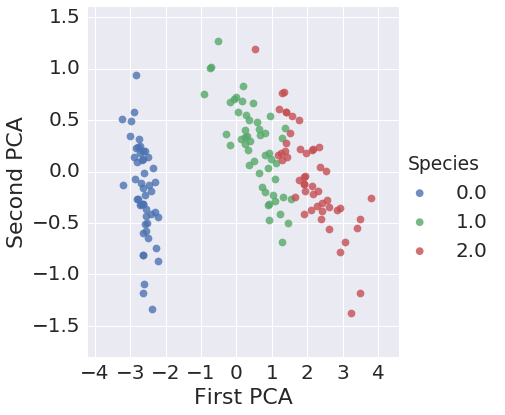

In [17]:
# We import helper code for getting and plotting the Iris data
from helper_code import iris as hi

# Now we grab the raw data, and also create a sampled grid of data.

# This code restricts the features to the top two PCA components
# This simplifies the viewing of the predited labels.

data = hi.get_data()
mdata = hi.get_mdata(data)

# Get features (x) and labels (y)
x = data[:, 0:2]
y = data[:, 2]

# Show the data
cols = ['PCA1', 'PCA2', 'Species']

# We make a plot of the features.
hi.scplot_data('PCA1', 'PCA2', pd.DataFrame(data, columns = cols), 'Species',
               'First PCA', 'Second PCA', (-4.2, 4.6), (-1.8, 1.6), 6)

-----

## [Random Forest][rf]

The previous algorithms all perform well for this small test data set.
But in more complex data, an alternative approach has been shown to be
extremely powerful. This new technique is known as the random forest,
and this approach is built on the concept of ensemble learning. Ensemble
learning leverages the power of many weak learners to produce a more
accurate prediction. A classic example of ensemble learning is when a
crowd is asked to guess the number of marbles in a jar. While the
likelihood that any one person is correct is extremely small, the
average value of the crowd's predictions is generally remarkably close
to the true result.

A random forest implements this concept by building a set of decision
trees (i.e., a forest) that each use a randomly selected amount of the
total training data and training attributes to make a prediction (or in
other words, randomly select both from the set of features and the
overall sample space). The predictions from the different trees are
statistically combined to make a final prediction. With scikit-learn, we
can easily apply a random forest classifier, which is located in the
`ensemble` module. Once again we create our model, train the model, and
subsequently use the model to make predictions as demonstrated below.

-----

[rf]: https://en.wikipedia.org/wiki/Random_forest

RF prediction accuracy =  97.4%


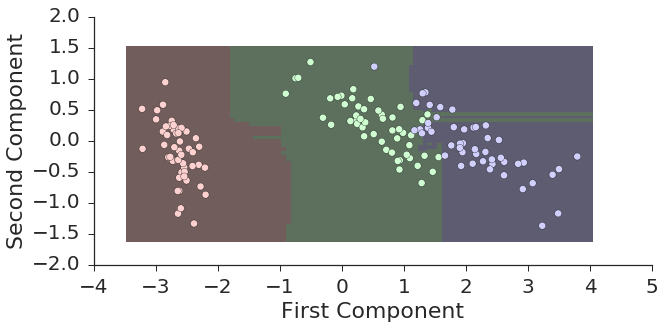

In [18]:
import sklearn.cross_validation as cv
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

# Next lets try Random Forests
from sklearn.ensemble import RandomForestClassifier

# Lets build our model and train it all at once
rfc = RandomForestClassifier(n_estimators=10, max_depth=None,
                             min_samples_split=1, random_state=0)

rfc.fit(x_train, y_train)

# Now grab the predictions
z = rfc.predict(mdata)

hi.splot_data(data, mdata, z, 'First Component', 'Second Component', 50)

print("RF prediction accuracy = {0:5.1f}%".format(100.0 * rfc.score(x_test, y_test)))

In [19]:
from sklearn.metrics import classification_report

y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred, \
                            target_names = ['Setosa', 'Versicolor', 'Virginica']))

             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        16
 Versicolor       0.91      1.00      0.95        10
  Virginica       1.00      0.92      0.96        12

avg / total       0.98      0.97      0.97        38



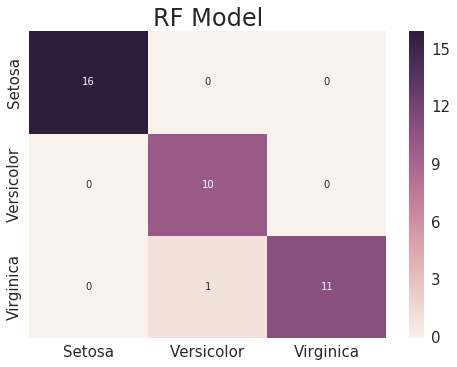

In [20]:
from helper_code import mlplots as mlp

mlp.confusion(y_test, y_pred, ['Setosa', 'Versicolor', 'Virginica'], 3, 'RF Model')

-----

# Classification Metrics

We can compute and display standard classification metrics for our
Random Forest classifier by using built-in scikit learn functionality.
Two standard measurements are the Receiver Operating Curve_ or ROC and
the _Area Under the Curve_ or AUC. For this we can use the [`roc_curve`][rocsk]
and [`auc`][aucsk] methods in scikit learn, which compare the real and predicted
values for each target class.

One caveat with these methods, however, is that we need to compute them
in a binary fashion, i.e, one against the rest, in order to determine how
well we are classifying each target class. We can do this with the
[`label_binarize`][lbsk] method in scikit learn.

We demonstrate this functionality in the following code block.


-----
[rocsk]: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
[aucsk]: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc
[lbsk]: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html#sklearn.preprocessing.label_binarize

[ 0.  1.] [ 0.85  1.  ] 0.925
[ 0.     0.125  1.   ] [ 0.          0.59259259  1.        ] 0.733796296296
[ 0.         0.0212766  1.       ] [ 0.          0.03571429  1.        ] 0.507218844985


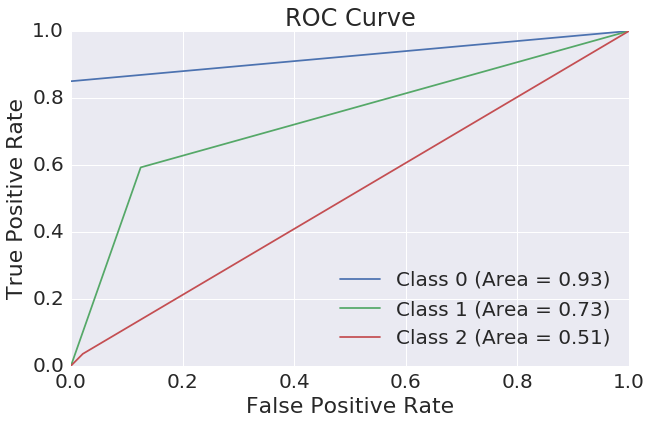

In [21]:
# First we have to binarize the classification
# This enables individual ROC curves to be constructed.

from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0, 1, 2])
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.5)

# Now build our classifier and compute test predictions
rfc = RandomForestClassifier(n_estimators=5, max_depth=2,
                             min_samples_split=1, random_state=0)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

# Need two metrics
from sklearn.metrics import roc_curve, auc

num_classes = 3

# Setup the Plot
sns.set(style="darkgrid", font_scale=2.0)
fig, ax = plt.subplots(figsize=(10,6))

# Now compute metrics and plot results
for idx in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test[:, idx], y_pred[:, idx]) #, pos_label=idx)
    roc_auc = auc(fpr, tpr)
    print(fpr,tpr,roc_auc)

    plt.plot(fpr, tpr, label='Class {0} (Area = {1:0.2f})'.format(idx, roc_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

sns.despine(offset=0, trim=True)
plt.show()

-----

## Student Activity

In the preceding cells, we used a random forest model to predict
classifications for the Iris Data. Now that you have run the Notebook
once, go back and make the following changes to see how the results
change.

1. Change the cross-validation split size, for example change from a
75%:25% to a 50%:50%?
2. Change the default parameters in the Random Forest algorithm, for
example, `criterion`, `max_features`, `bootstrap`, `oob`, or
`max_depth`. Read the code documentation to learn about the default
parameters.
3. Change the parameters in the RF classifier in the ROC code block and
see how the curves change, for example, `n_estimators` and `max_depth`.

How does the two-dimensional figure compare to the same figure in the DT
Notebook?

-----

## Handwritten Digits

Now we switch to a second type of data and explore Random Forest
classification applied to handwritten digits. First we will load the
data and review some of the sample. After which, we will apply an RF
classification to these data and explore the resulting predictions.

-----

Total number of samples = 1797


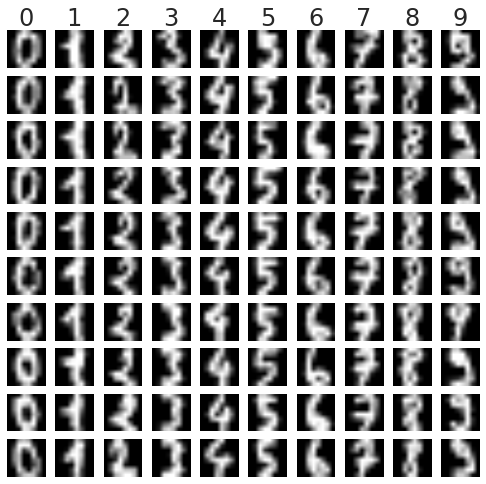

In [22]:
# We have helper code to assist in the loading and plotting of these data
from helper_code import digits as hd

# We extract features (x), labels (y), and the images for plotting.
x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(y.shape[0]))

-----

### Classification of image data

Now that these data are loaded, we can apply a Random Forest classifier
to this problem. Below we employ this model, and show the classification
score, the classification report, and the confusion matrix.

-----

In [23]:
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.50)

# Lets build our model and train it all at once
rfc = RandomForestClassifier(n_estimators=100, max_depth=None,
                             min_samples_split=5, random_state=0)

rfc.fit(x_train, y_train)

print('Prediction Accuracy = {0:3.1f}%'.format(100*rfc.score(x_test, y_test)))

Prediction Accuracy = 97.2%


In [24]:
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99        94
          1       0.97      0.98      0.97        94
          2       1.00      1.00      1.00        76
          3       0.98      0.98      0.98        88
          4       0.99      0.96      0.97        98
          5       0.93      0.97      0.95        89
          6       0.98      1.00      0.99        88
          7       0.97      0.98      0.98       105
          8       0.98      0.92      0.95        90
          9       0.92      0.95      0.94        77

avg / total       0.97      0.97      0.97       899



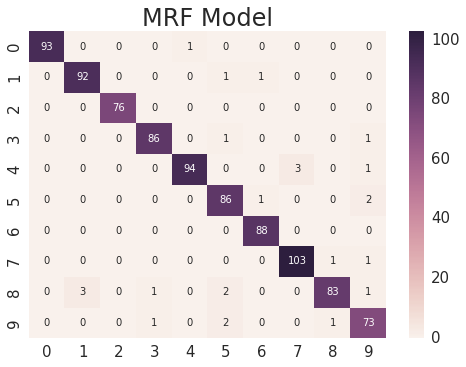

In [25]:
nms = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

mlp.confusion(y_test, y_pred, nms, 10, "MRF Model")

-----

### Model Evaluation

The Random Forest model performed in a reasonable manner, but what about
on completely blind data. We can test the model by _making_ new data.
Below we use methods in the helper code to make _fake_ data, in this
case images of **one** and **seven**. We display the _fake_ images, and
then the results of our model classifying these new data.

-----



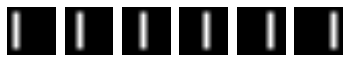

In [26]:
# Test on our sevens

ones = hd.make_ones()

hd.plot_numbers(ones)

In [27]:
# You can change the values to make other numbers.

ones[0].reshape(8,8)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [28]:
print('Actual : Predicted')

for one in ones:
    print('  1    :     {0}'.format(rfc.predict(one.ravel())[0])) 

Actual : Predicted
  1    :     5
  1    :     5
  1    :     1
  1    :     1
  1    :     3
  1    :     7


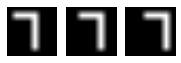

In [29]:
# Now test on our sevens

sevens = hd.make_sevens()
hd.plot_numbers(sevens)

In [30]:
print('Actual : Predicted')
for seven in sevens:
    print('  7    :     {0}'.format(rfc.predict(seven.ravel())[0])) 

Actual : Predicted
  7    :     3
  7    :     9
  7    :     7


-----

## Student Activity

In the preceding cells, we used a Random Forest model to predict
classifications for the digit data. Now that you have run the Notebook,
go back and make the following changes to see how the results change.

1. Change the cross-validation split size, for example change from a
75%:25% to a 50%:50%?
2. Change the default parameters in the Random Forest
algorithm. Read the code documentation to learn about the default
parameters.
3. Change the RF algorithm to an [Extra Trees Classifier][etc].

Finally can you explain (feel free to use the class forums) why the
model performed in the  manner it did for the _fake_ digits
(particularily in comparison to the DT algorithm)?

-----
[etc]: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier